# Code attribuition:
# source:
- https://www.kaggle.com/code/officialsubhash/rnn-text-generation-one-character-level#Data-Preprocessing
- https://www.kaggle.com/datasets/tientd95/movierating
- https://www.kaggle.com/code/shahraizanwar/covid19-tweets-sentiment-prediction-rnn-85-acc/notebook
- https://sparkbyexamples.com/spark/different-ways-to-create-a-spark-dataframe/
- https://www.kaggle.com/code/himanshutripathi/pyspark-newscategoryclassification
- https://www.kaggle.com/code/tanyildizderya/imdb-dataset-sentiment-analysis-using-rnn/input


In [1]:
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import string

2024-09-09 18:15:09.784011: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-09 18:15:09.785237: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 18:15:09.788638: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 18:15:09.799494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 18:15:09.817884: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

2024-09-09 18:15:10.778866: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

import re

In [ ]:

%pip install pandas-profiling
%pip install wordcloud
%pip install kaggle
%pip install ydata-profiling
%pip install numpy
%pip install matplotlib
%pip install seaborn



ERROR: Exception:
Traceback (most recent call last):
  File "/home/lab_services_student/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "/home/lab_services_student/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "/home/lab_services_student/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/home/lab_services_student/anaconda3/lib/python3.9/site-packages/pip/_internal/commands/install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "/home/lab_services_student/anaconda3/lib/python3.9/site-packages/pip/_internal/metadata/pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "/home/lab_services_student/anaconda3/lib/python3.9/site-packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import nltk
from markupsafe import escape
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras


In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L1L2


In [5]:
# Import necessary libraries

from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define total_words)
total_words = 10000  # Example value, adjust as needed

#  build a simple sequential model:
model = Sequential()
model.add(Embedding(total_words, 100))  # Now using the defined total_words
model.add(LSTM(128))
model.add(Dense(41, activation='softmax'))  # 41 output classes as per your y data

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )



In [6]:
%pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset


Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 90%|██████████████████████████████████▎   | 24.0M/26.5M [00:01<00:00, 27.1MB/s]
100%|██████████████████████████████████████| 26.5M/26.5M [00:01<00:00, 18.7MB/s]


In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset --unzip --force


Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 79%|██████████████████████████████        | 21.0M/26.5M [00:01<00:00, 28.5MB/s]
100%|██████████████████████████████████████| 26.5M/26.5M [00:01<00:00, 21.2MB/s]


In [7]:
import os

# List files in the current directory (or specify a directory)
print(os.listdir())


['.conda', 'README.md', 'kaggle.json', 'Task1.ipynb', 'spark-3.2.0-bin-hadoop3.2', 'bestvalue', 'News_Category_Dataset_v3.json', '.git']


In [8]:
#reading of and display of choosen dataset
df = pd.read_json('/home/lab_services_student/prog_task1/News_Category_Dataset_v3.json', lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


# Code below contains:
- total number of unique categories
- information about metadata

In [9]:
print(df.shape)
print("Unique categories:",df['category'].nunique())
print("-------------------------------------------------")
df.info()

(209527, 6)
Unique categories: 42
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


# Following code cells are for:
- Data exploration and pre-processing
- Profiling report of dataset
- Text data visualization

In [69]:
from ydata_profiling import profile_report


In [71]:
df.profile_report()

ModuleNotFoundError: No module named 'ipywidgets'

In [10]:
#droping coloumn attributes
new_df = df.drop(columns=['authors','link','date'])
new_df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [11]:
#Visualisation of Top 20 categories of news articles in the form of a pie chart
cat_df = pd.DataFrame(new_df['category'].value_counts()).reset_index()
cat_df.rename(columns={'category': 'news_classes', 'count': 'numcat'}, inplace=True)
cat_df.head()


,news_classes,numcat
0,POLITICS,35602
1,WELLNESS,17945
2,ENTERTAINMENT,17362
3,TRAVEL,9900
4,STYLE & BEAUTY,9814


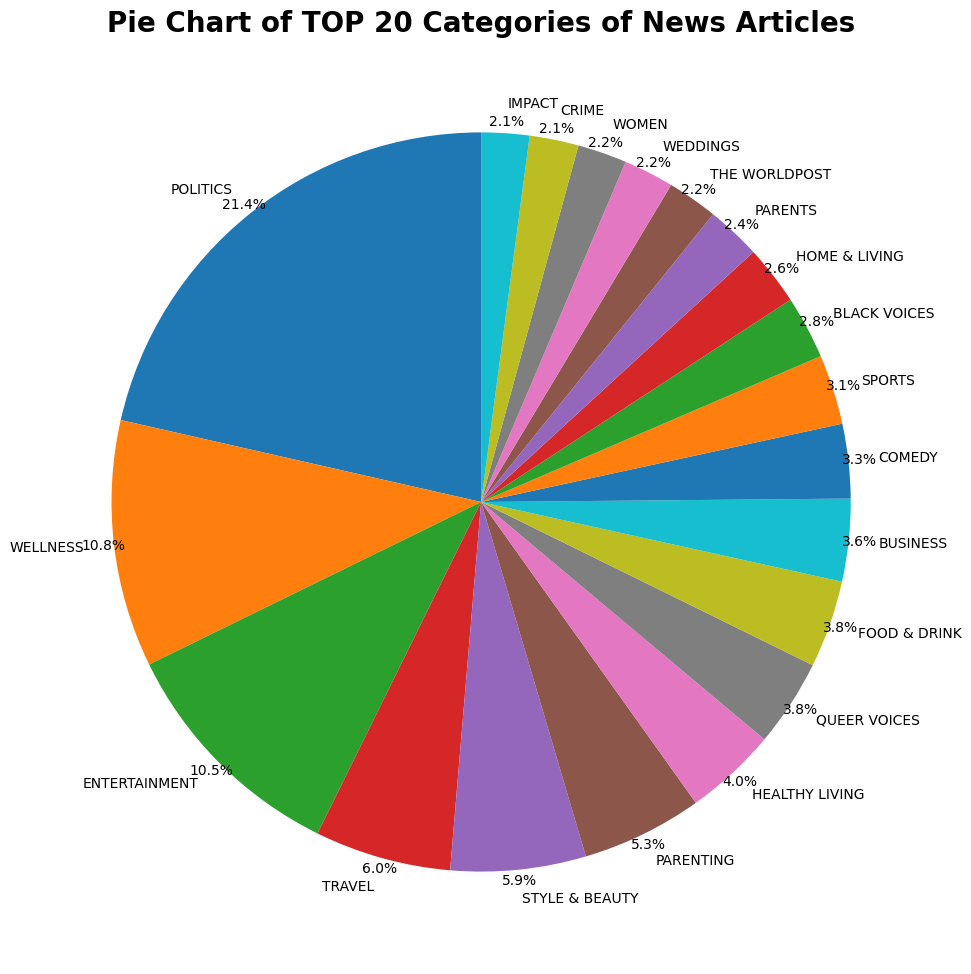

In [59]:
import matplotlib.pyplot as plt

# Plot the pie chart for the top 20 categories
fig = plt.figure(figsize=(12, 12))
plt.pie(cat_df['numcat'][:20],  # Values (e.g., count or frequency of each category)
        labels=cat_df['news_classes'][:20],  # Category names
        autopct='%1.1f%%',  # Display percentage with 1 decimal place
        startangle=90,      # Rotate the start of the pie
        labeldistance=1.08,  # Distance of the label from the center
        pctdistance=1.03)    # Distance of the percentage label from the center

plt.title("Pie Chart of TOP 20 Categories of News Articles", size=20, weight='bold')

# Show the plot
plt.show()


# Following cells of code contain:
Lengths of 'headline' and 'short_description' of each category¶
creatiion final dataframe of combined headline and short_descript
ion
maximum length of news in each category
minimum lenght of news in each category

In [12]:
final_df = new_df.copy()
final_df['length_of_news'] = final_df['headline'] + final_df['short_description']
final_df.drop(['headline','short_description'], inplace=True, axis=1)
final_df['len_news'] = final_df['length_of_news'].map(lambda x: len(x))
final_df.head()

,category,length_of_news,len_news
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...,230
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li...",248
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...,133
3,PARENTING,The Funniest Tweets From Parents This Week (Se...,215
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...,233


In [13]:
lenmax_df = final_df.groupby('category')['len_news'].max().reset_index().sort_values(by='len_news',ascending=False)
lenmax_df.head()

,category,len_news
24,POLITICS,1486
41,WORLDPOST,1424
4,COLLEGE,1225
16,HEALTHY LIVING,1073
38,WELLNESS,1036


# Following cells of code are data visualisations fore:
- Max length top 10 news categories
- Min length of top 10 news categories
# Findings are:
- Politics is the news category with the most articles and the longest article characters (headlines and brief descriptions).
- Politics, wellness, and entertainment are the top three categories with the largest number of articles in our statistics.
- followed by the World Post, College, Healthy Living, and Wellness categories.

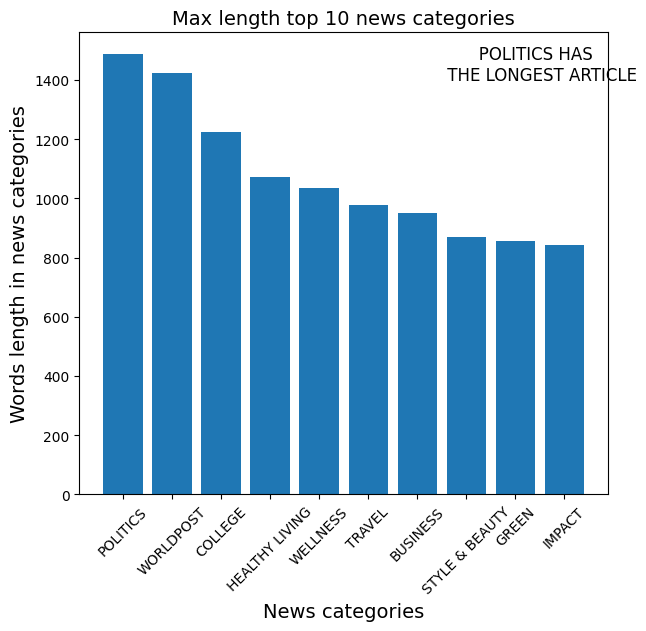

In [14]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.bar(lenmax_df['category'][:10],lenmax_df['len_news'][:10])
plt.xticks(rotation=45)
plt.ylabel("Words length in news categories", size=14)
plt.xlabel("News categories",  size=14)
plt.text(6.5,1400, '''       POLITICS HAS
 THE LONGEST ARTICLE''', fontsize=12)
plt.title("Max length top 10 news categories", size=14)
plt.show()

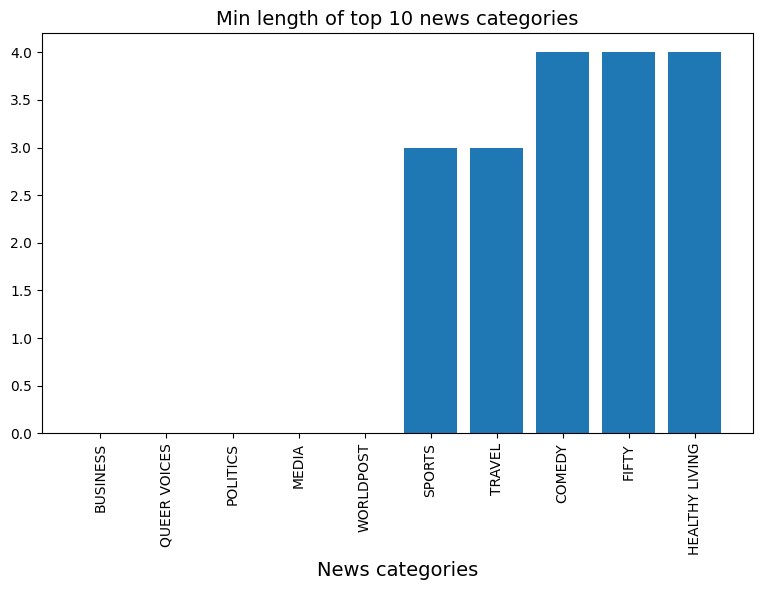

In [15]:
import matplotlib.pyplot as plt

# Calculate lenmin_df here. 
# For example, if you want the minimum length per category:
lenmin_df = final_df.groupby('category')['len_news'].min().reset_index().sort_values(by='len_news')

plt.figure(figsize=(15,6))

plt.subplot(122)
plt.bar(lenmin_df['category'][:10], lenmin_df['len_news'][:10])
plt.xticks(rotation=90)  # Rotate x-axis labels for more space
plt.xlabel("News categories", size=14)
plt.title("Min length of top 10 news categories", size=14)
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.show()

In [17]:
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(final_df.category))

<Figure size 1200x1200 with 0 Axes>

In [18]:
ndf = final_df.copy()
ndf.drop('len_news', inplace=True, axis=1)
categories = cat_df['news_classes'][:10].to_list()


In [19]:
articles_list = []

for i in categories:
    cat_ndf = ndf[ndf['category'] == i]
    cat_array = cat_ndf['length_of_news'].values  
    articles_list.append(cat_array)

In [20]:
wc1 = WordCloud(max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=True,
               stopwords=STOPWORDS)

plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

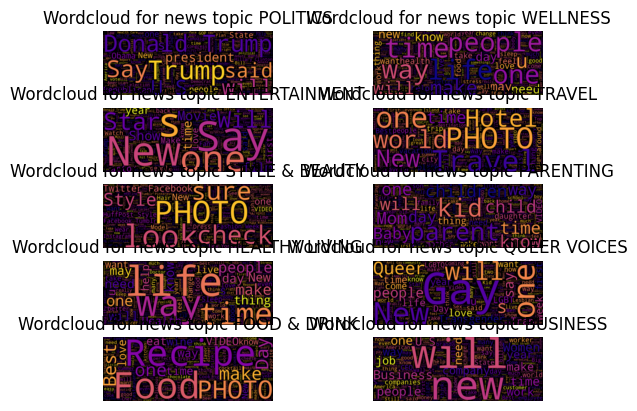

In [21]:
for idx, j in enumerate(categories):
    plt.subplot(5,2,idx+1)
    cloud = wc1.generate(' '.join(articles_list[idx]))
    plt.imshow(cloud, interpolation= "bilinear")
    plt.title(f"Wordcloud for news topic {j}")
    plt.axis('off')

# below code contains:
-  list of 16000 row labels of POLITICS category
- droping these 16000 labels from the dataset

In [22]:
politics_list = list(ndf[ndf['category'] == 'POLITICS'].index)
list_16 = politics_list[:16000]
ndf2 = ndf.copy()
ndf2.drop(list_16, axis=0, inplace=True)

# Below code contains:
- removing stop-words
- word lemmatization


In [23]:
def datacleaning(text):
    whitespace = re.compile(r"\s+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = whitespace.sub(' ', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]","", text)
    text = re.sub("\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    text = text.lower()

    text = [word for word in text.split() if word not in list(STOPWORDS)]


    sentence = []
    for word in text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word,'v'))

    return ' '.join(sentence)

In [24]:
#nltk package download of averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lab_services_student/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
# nltk import and wordnet dowload
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lab_services_student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Following code cells contains code that:
- pre-processing using previous function
- apply datacleaning function to column 'length_of_news'
- length of total characters before and after cleaning text data


In [26]:
print("Text sentence before pre-processing:\n",ndf2['length_of_news'][0])
print("---"*35)
print("Text sentence after pre-processing:\n",datacleaning(ndf2['length_of_news'][0]))

Text sentence before pre-processing:
 Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID BoostersHealth experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.
---------------------------------------------------------------------------------------------------------
Text sentence after pre-processing:
 million americans roll sleeves omicrontargeted covid boostershealth experts say early predict whether demand match million dose new boosters us order fall


In [27]:
ndf2['length_of_news'] = ndf2['length_of_news'].apply(datacleaning)


In [28]:
old_length = ndf['length_of_news'].apply(len).sum()
new_length = ndf2['length_of_news'].apply(len).sum()
print(f"Old chracters length of text data: {old_length}")
print(f"New chracters length of text data: {new_length}")

Old chracters length of text data: 36169394
New chracters length of text data: 23058828


In [29]:
# tokenization and vectorization workflow
# word level one-hot encoding for sample data

samples = list(ndf2['length_of_news'][:5].values)  # samples of first 5 documents of out dataset

token_index = {}  # builds an index of tokens in the data
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1 # assigning unique index to each unique words

max_length = 15

results = np.zeros(shape=(len(samples),   # results will be stored in this array
                          max_length,
                          max(token_index.values()) +1))

print("Shape of stored results array:", results.shape)
print("Token index of unique words: \n", token_index)

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1

Shape of stored results array: (5, 15, 91)
Token index of unique words: 
 {'million': 1, 'americans': 2, 'roll': 3, 'sleeves': 4, 'omicrontargeted': 5, 'covid': 6, 'boostershealth': 7, 'experts': 8, 'say': 9, 'early': 10, 'predict': 11, 'whether': 12, 'demand': 13, 'match': 14, 'dose': 15, 'new': 16, 'boosters': 17, 'us': 18, 'order': 19, 'fall': 20, 'american': 21, 'airlines': 22, 'flyer': 23, 'charge': 24, 'ban': 25, 'life': 26, 'punch': 27, 'flight': 28, 'attendant': 29, 'videohe': 30, 'subdue': 31, 'passengers': 32, 'crew': 33, 'flee': 34, 'back': 35, 'aircraft': 36, 'confrontation': 37, 'accord': 38, 'attorneys': 39, 'office': 40, 'los': 41, 'angeles': 42, 'funniest': 43, 'tweet': 44, 'cat': 45, 'dog': 46, 'week': 47, 'sept': 48, 'dont': 49, 'understand': 50, 'eat': 51, 'parent': 52, 'accidentally': 53, 'put': 54, 'grownup': 55, 'toothpaste': 56, 'toddlers': 57, 'toothbrush': 58, 'scream': 59, 'clean': 60, 'teeth': 61, 'carolina': 62, 'reaper': 63, 'dip': 64, 'tabasco': 65, 'sauce

In [31]:
# one hot encoding using keras tokenizer and pad sequencing
X = ndf2['length_of_news']
encoder = LabelEncoder()
y = encoder.fit_transform(ndf2['category'])
print("shape of input data: ", X.shape)
print("shape of target variable: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

tokenizer = Tokenizer(num_words=100000, oov_token='<00V>') 

vocab_size = len(tokenizer.word_index)+1

tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

# padding X_test text input data
test_seq = tokenizer.texts_to_sequences(X_test)
test_padseq = pad_sequences(test_seq, maxlen=20)

word_index = tokenizer.word_index
max_words = 150000  # total number of words to consider in embedding layer
total_words = len(word_index)
maxlen = 130 # max length of sequence 
y_train = to_categorical(y_train, num_classes=50)
y_test = to_categorical(y_test, num_classes=50)
n_features = 1
print("Length of word index:", total_words)

shape of input data:  (193527,)
shape of target variable:  (193527,)


Length of word index: 181275


# Following code cells contain an attempt Model training using embedding layer and RNN

In [43]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=20))
model.add(LSTM(128))
model.add(Dense(50, activation='softmax'))  # Directly go to the output layer with 50 units

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# SETUP AN EARLY STOPPING CALLBACK and MODEL CHECKPOINT
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=5,
                                              verbose=1,
                                              mode='max')

checkpointer = keras.callbacks.ModelCheckpoint(filepath='bestvalue.keras',
                                               monitor='val_loss',
                                               verbose=0,
                                               save_best_only=True)


callback_list = [checkpointer, earlystopping]



/home/lab_services_student/prog_task1/.conda/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
# Assuming you're using a Sequential model
model.add(Dense(50, activation='softmax'))  # Make sure this matches the number of classes


In [45]:
print(train_padseq.shape)


(154821, 20)


In [46]:
# Print shapes to verify
print("Shape of train_padseq:", train_padseq.shape)
print("Shape of y_train:", y_train.shape)

# Print model summary to verify architecture
model.summary()


Shape of train_padseq: (154821, 20)
Shape of y_train: (154821, 50)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(train_padseq, y_train, 
                    batch_size=128, 
                    epochs=15, 
                    validation_split=0.2, 
                    callbacks=callback_list)  # Add the callback list here


Epoch 1/15
238/968 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.0655 - loss: 3.8290

968/968 ━━━━━━━━━━━━━━━━━━━━ 61s 61ms/step - accuracy: 0.0824 - loss: 3.6786 - val_accuracy: 0.1004 - val_loss: 3.4220
Epoch 2/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.1098 - loss: 3.4018 - val_accuracy: 0.1639 - val_loss: 3.2981
Epoch 3/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.1736 - loss: 3.2415 - val_accuracy: 0.1828 - val_loss: 3.1204
Epoch 4/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.1868 - loss: 3.0545 - val_accuracy: 0.1982 - val_loss: 2.9968
Epoch 5/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.2073 - loss: 2.9140 - val_accuracy: 0.2109 - val_loss: 2.9162
Epoch 6/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.2264 - loss: 2.7778 - val_accuracy: 0.2307 - val_loss: 2.8006
Epoch 7/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.2480 - loss: 2.6595 - val_accuracy: 0.2655 - val_loss: 2.7290
Epoch 8/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.2960 - loss: 2.5570 - val_accurac

In [48]:
# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

test loss and accuracy: 2.4255237579345703 0.40102308988571167


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [50]:
model2 = Sequential()
model2.add(Embedding(total_words, 100, input_length=maxlen))
model2.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model2.add(Conv1D(64, 3, activation='relu'))
model2.add(MaxPooling1D(2))
model2.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)))
model2.add(Dropout(0.3))
model2.add(Dense(50, activation='softmax'))  # Assuming 50 classes
model2.compile(optimizer='adam',  # You can experiment with different optimizers
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

/home/lab_services_student/prog_task1/.conda/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model2 = Sequential()
model2.add(Embedding(input_dim=total_words, output_dim=100, input_length=20))
model2.add(LSTM(128))
model2.add(Dense(50, activation='softmax'))  # Directly go to the output layer with 50 units

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# SETUP AN EARLY STOPPING CALLBACK and MODEL CHECKPOINT
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=5,
                                              verbose=1,
                                              mode='max')

checkpointer = keras.callbacks.ModelCheckpoint(filepath='bestvalue.keras',
                                               monitor='val_loss',
                                               verbose=0,
                                               save_best_only=True)


callback_list = [checkpointer, earlystopping]


In [52]:
# fit model to the data
history2 = model2.fit(train_padseq, y_train, 
                     batch_size=128, 
                     epochs=15, 
                     validation_split=0.2,
                     shuffle=True
                    )


Epoch 1/15


968/968 ━━━━━━━━━━━━━━━━━━━━ 60s 60ms/step - accuracy: 0.1770 - loss: 3.1772 - val_accuracy: 0.4172 - val_loss: 2.2279
Epoch 2/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.4658 - loss: 2.0211 - val_accuracy: 0.5018 - val_loss: 1.8624
Epoch 3/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.5615 - loss: 1.6095 - val_accuracy: 0.5299 - val_loss: 1.7456
Epoch 4/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.6246 - loss: 1.3619 - val_accuracy: 0.5494 - val_loss: 1.6832
Epoch 5/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.6750 - loss: 1.1632 - val_accuracy: 0.5468 - val_loss: 1.6973
Epoch 6/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.7200 - loss: 0.9939 - val_accuracy: 0.5528 - val_loss: 1.7357
Epoch 7/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.7573 - loss: 0.8584 - val_accuracy: 0.5491 - val_loss: 1.7521
Epoch 8/15
968/968 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.7938 - loss: 0.7301 - val_accurac

In [53]:

# evalute the model
test_loss2, test_acc2 = model2.evaluate(test_padseq, y_test, verbose=0)
print("test loss and accuracy:", test_loss2, test_acc2)

test loss and accuracy: 2.7773871421813965 0.5065106153488159


In [54]:
def plot_loss_accuracy(history):

    # create object of arrays of accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # number of epochs in our model
    epochs = range(1 ,len(acc) + 1)
    
    # call matplolib figure object and plot loss and accuracy curves
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and validation accuracy", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("accuracy", fontsize=14)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and validation loss", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.legend()
    
    plt.show()

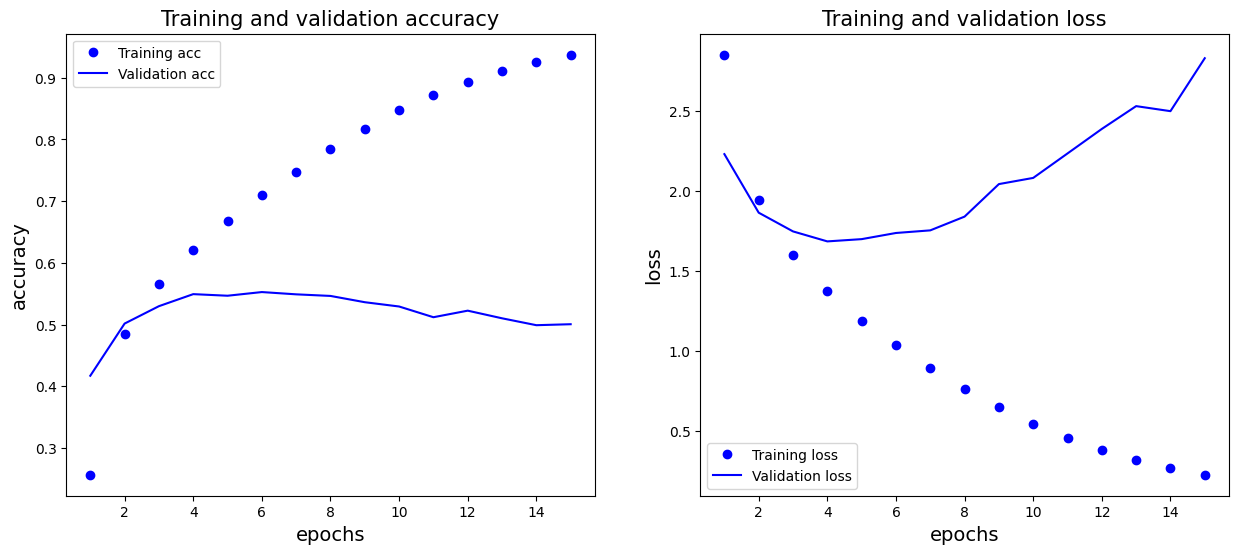

In [55]:
plot_loss_accuracy(history2)


In [56]:
import tensorflow as tf

# Create TensorFlow datasets from your data
train_data = tf.data.Dataset.from_tensor_slices((trainMixed, trainVocals))
valid_data = tf.data.Dataset.from_tensor_slices((testMixed, testVocals))

# Shuffle, batch, and prefetch the datasets
train_data = train_data.shuffle(buffer_size=10000).batch(128).prefetch(tf.data.experimental.AUTOTUNE)
valid_data = valid_data.batch(128).prefetch(tf.data.experimental.AUTOTUNE)

# Compile the model if not already done
model.compile(optimizer='adam',  # Adjust optimizer if needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=10, validation_data=valid_data)

# Optional: Save the trained model
model.save('your_model.h5')


NameError: name 'trainMixed' is not defined

In [57]:
tf.keras.backend.clear_session()

# hyper parameters
EPOCHS = 2
BATCH_SIZE = 32
embedding_dim = 16
units = 256

model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(units,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)
])


model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

IndexError: tuple index out of range

In [ ]:
df.info(memory_usage = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB
